In [16]:
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = pandas.read_csv(r'C:\Users\strut\OneDrive - GLASGOW CALEDONIAN UNIVERSITY\4th Year\Hons Code\Final Code\Extractions\VIS.csv')
# iris2 = pandas.read_csv(r'C:\Users\strut\OneDrive - GLASGOW CALEDONIAN UNIVERSITY\4th Year\HONS\Final\main extract feature.csv')
print(iris.head())
print('-------------------------------------------------------------------------------------------------------------------')
# print(iris2.head())

   Length   Entropy  Vowel  Consonant  Special     V Con     C Vow  Lines  \
0     702  4.272703    143        239      320  0.598326  1.671329     21   
1     120  4.530789     28         51       41  0.549020  1.821429      3   
2      88  4.781057     23         43       22  0.534884  1.869565      2   
3    1754  5.307355    473        850      431  0.556471  1.797040     60   
4    9150  4.872465   2073       3462     3615  0.598787  1.670043    301   

   State  
0      0  
1      0  
2      0  
3      0  
4      0  
-------------------------------------------------------------------------------------------------------------------


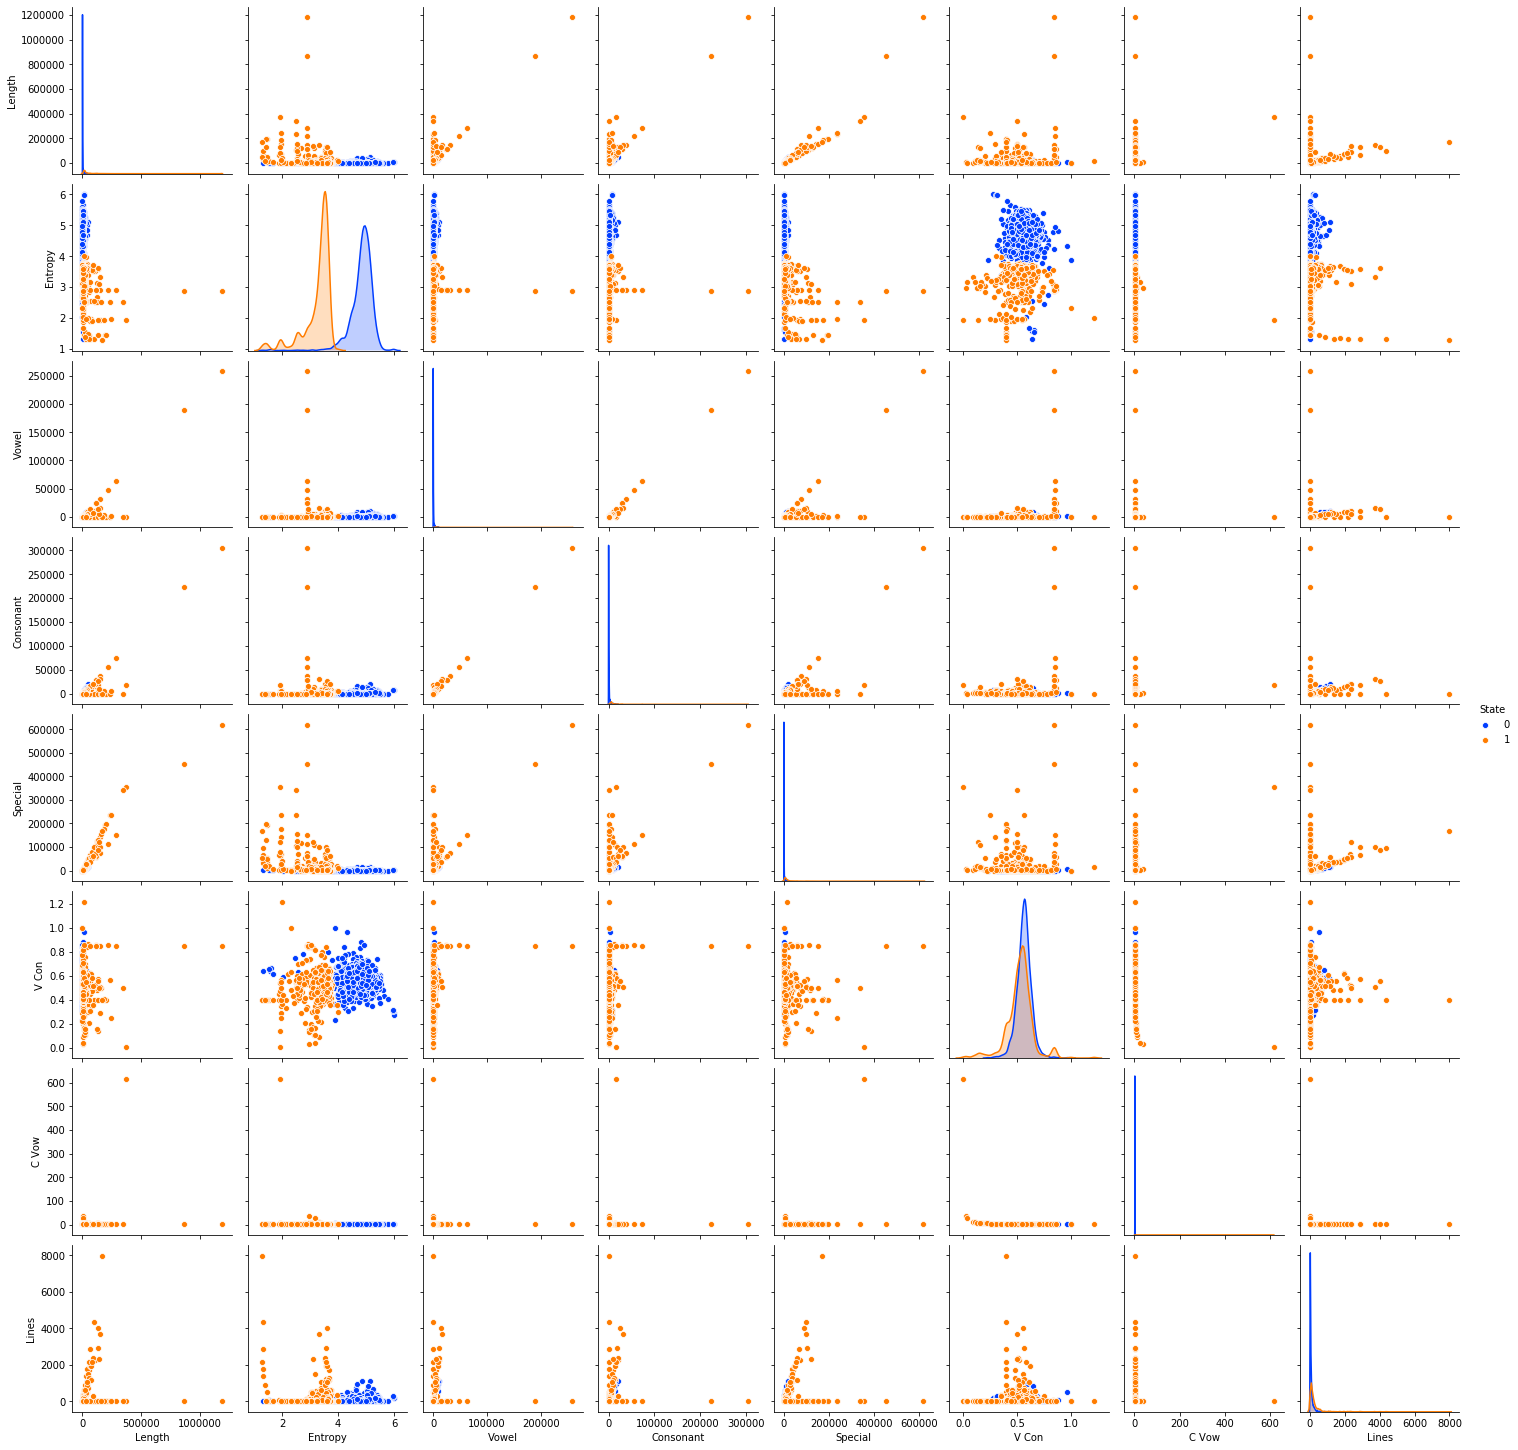

In [17]:
y = iris.State
X = iris.drop('State',axis=1)
sns.pairplot(iris, hue="State",palette="bright")

In [10]:
df=iris[(iris['Type']!='')]
df=df.drop(['String Len','Vowel','Consonant','Special','Total Lines'], axis=1)
print(df.head())
print(df.tail())

   Type   Entropy  V Con Val
0     0  4.272703   0.598326
1     0  4.530789   0.549020
2     0  4.781057   0.534884
3     0  5.307355   0.556471
4     0  4.872465   0.598787
      Type   Entropy  V Con Val
2230     1  2.859582   0.633333
2231     1  3.626550   0.578983
2232     1  2.024877   0.441860
2233     1  3.590487   0.535147
2234     1  1.960772   0.550000


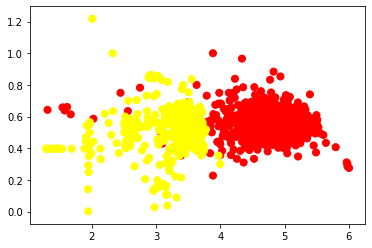

In [11]:
X=df.iloc[:,1:3]
y=df['Type']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

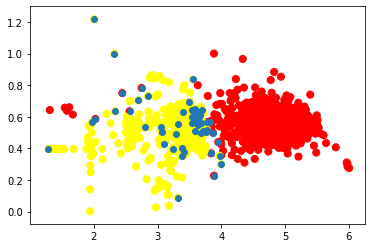

In [12]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf', C=1E10)
model.fit(X, y)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

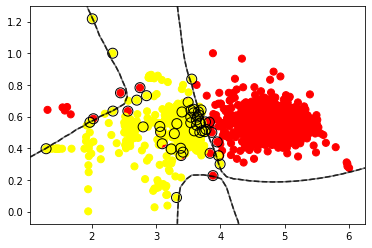

In [13]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()